## Dataset Information

This dataset comprises of sales transactions captured at a retail store. It’s a classic dataset to explore and expand your feature engineering skills and day to day understanding from multiple shopping experiences. This is a regression problem. The dataset has 550,069 rows and 12 columns.

**Problem:** Predict purchase amount

## Attributes:
| Column ID |         Column Name        | Data type |           Description           | Masked |
|:---------:|:--------------------------:|:---------:|:-------------------------------:|--------|
|     0     |           User_ID          |   int64   |      Unique Id of customer      | False  |
|     1     |         Product_ID         |   object  |       Unique Id of product      | False  |
|     2     |           Gender           |   object  |         Sex of customer         | False  |
|     3     |             Age            |   object  |         Age of customer         | False  |
|     4     |         Occupation         |   int64   |   Occupation code of customer   | True   |
|     5     |        City_Category       |   object  |         City of customer        | True   |
|     6     | Stay_In_Current_City_Years |   object  | Number of years of stay in city | False  |
|     7     |       Marital_Status       |   int64   |    Marital status of customer   | False  |
|     8     |     Product_Category_1     |   int64   |       Category of product       | True   |
|     9     |     Product_Category_2     |  float64  |       Category of product       | True   |
|     10    |     Product_Category_3     |  float64  |       Category of product       | True   |
|     11    |          Purchase          |   int64   |         Purchase amount         | False  |

## Import modules

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


## Loading the dataset

In [3]:
import io
df = pd.read_csv(io.BytesIO(uploaded['train.csv']))
df.head()


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [ ]:
# statistical info
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [ ]:
### we can see that the numerical features have different ranges of values, and the scale of the values varies significantly. For example, the "Occupation" feature has a range of values from 0 to 20, while the "Purchase" feature has a range of values from 12 to 23961.

In [ ]:
# datatype info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [ ]:
# find unique values
df.apply(lambda x: len(x.unique()))

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Product_Category_2               18
Product_Category_3               16
Purchase                      18105
dtype: int64

## Exploratory Data Analysis

<Axes: xlabel='Purchase', ylabel='Density'>

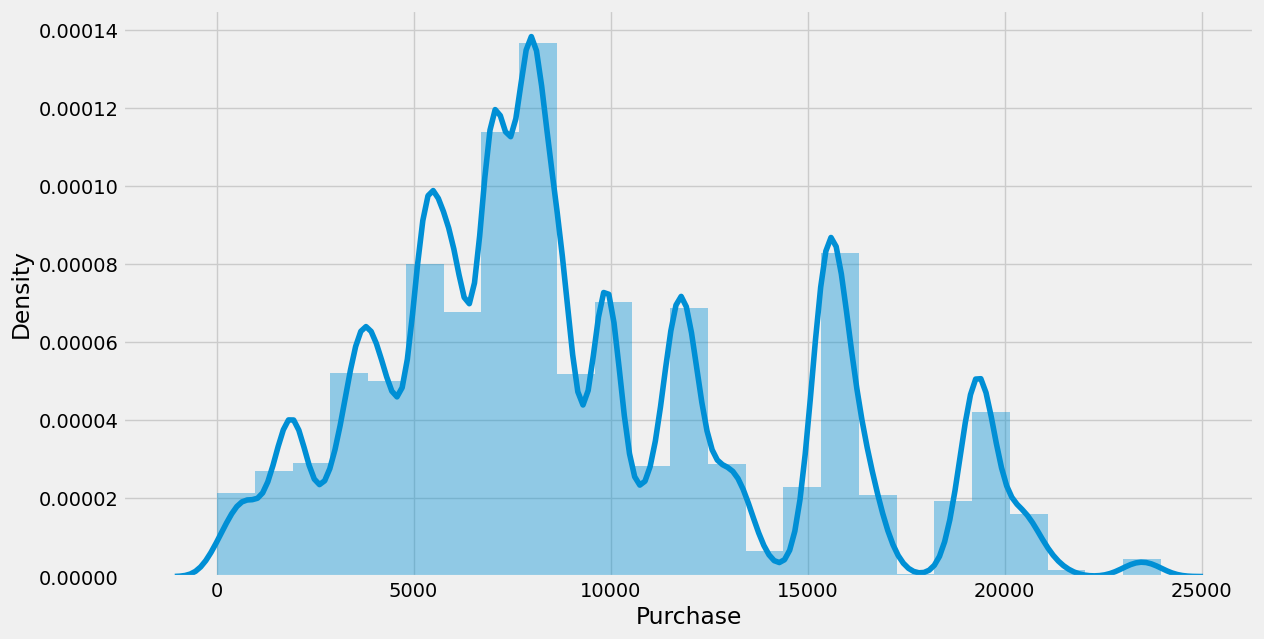

In [ ]:
# distplot for purchase
plt.style.use('fivethirtyeight')
plt.figure(figsize=(13, 7))
sns.distplot(df['Purchase'], bins=25)

<Axes: xlabel='Gender', ylabel='count'>

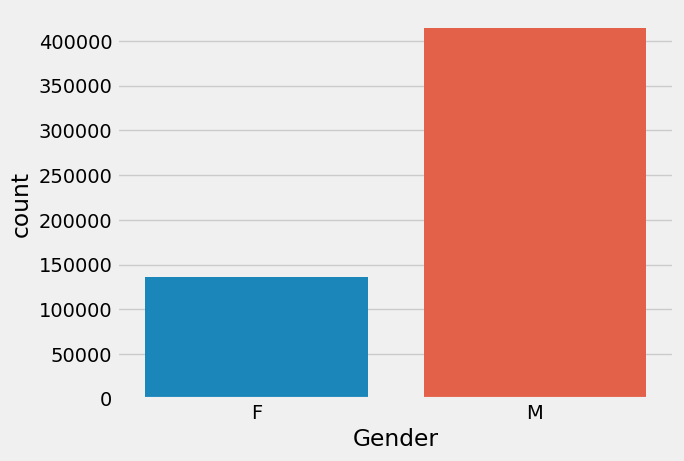

In [ ]:
# distribution of numeric variables
sns.countplot(x = df['Gender'])

<Axes: xlabel='Age', ylabel='count'>

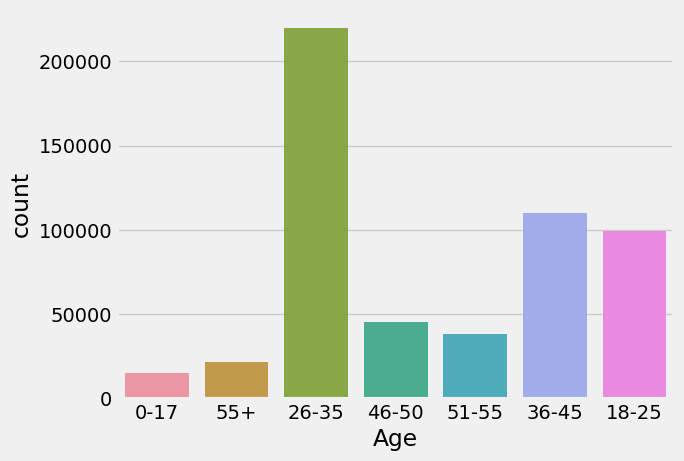

In [ ]:
sns.countplot(x = df['Age'])

<Axes: xlabel='Marital_Status', ylabel='count'>

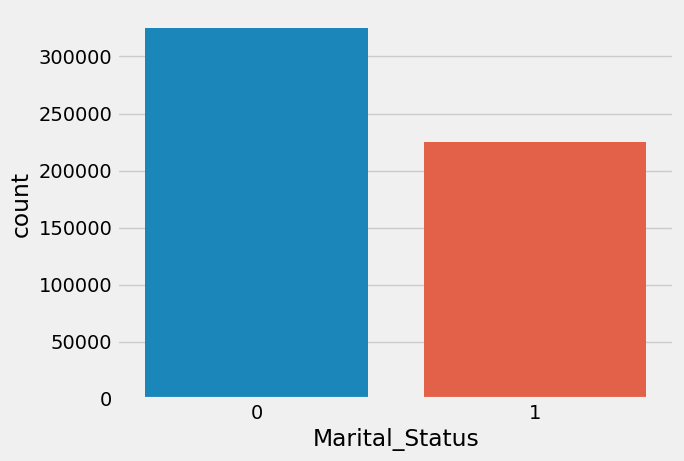

In [ ]:
sns.countplot(x = df['Marital_Status'])

<Axes: xlabel='Occupation', ylabel='count'>

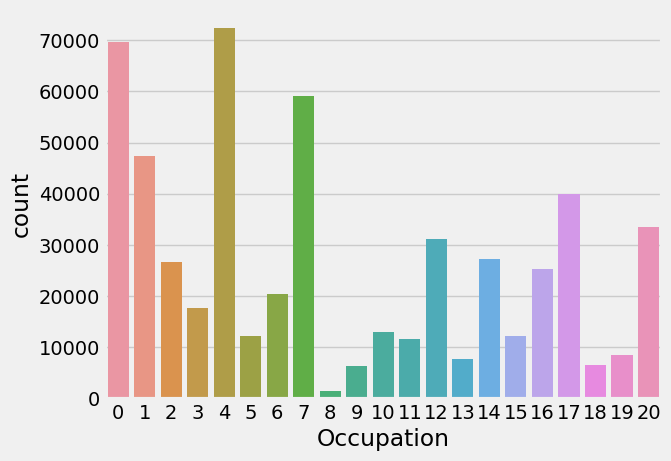

In [ ]:
sns.countplot(x = df['Occupation'])

<Axes: xlabel='Product_Category_1', ylabel='count'>

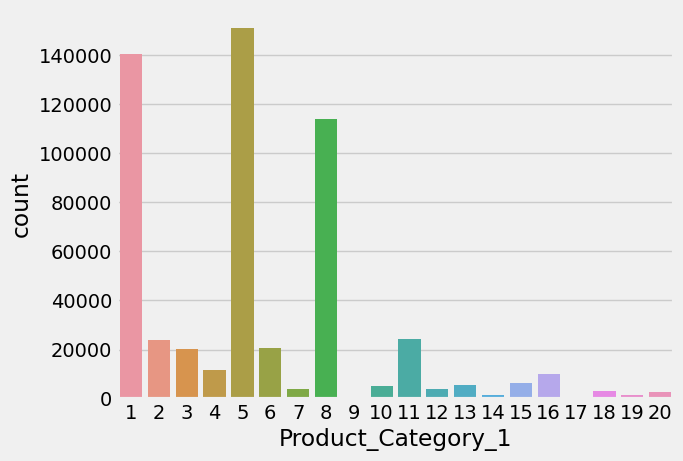

In [ ]:
sns.countplot(x = df['Product_Category_1'])

<Axes: xlabel='Product_Category_2', ylabel='count'>

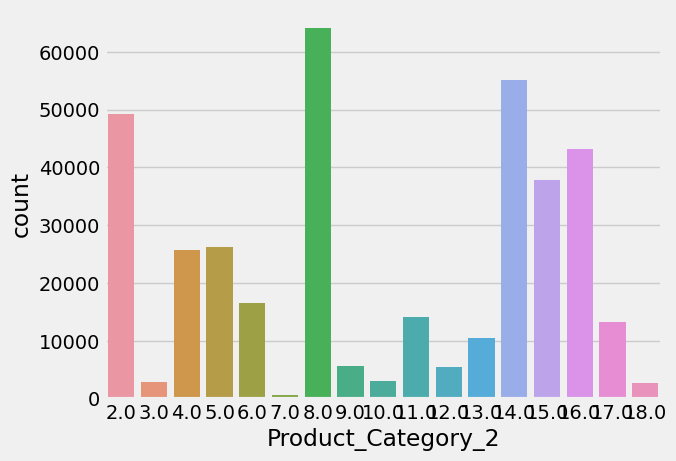

In [ ]:
sns.countplot(x = df['Product_Category_2'])

<Axes: xlabel='Product_Category_3', ylabel='count'>

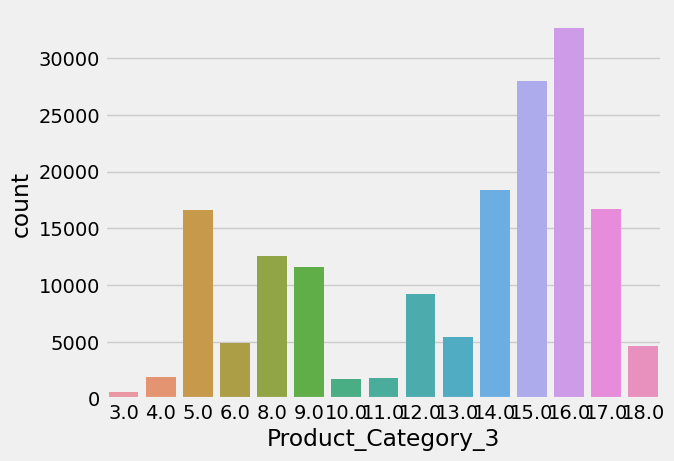

In [ ]:
sns.countplot(x = df['Product_Category_3'])

<Axes: xlabel='City_Category', ylabel='count'>

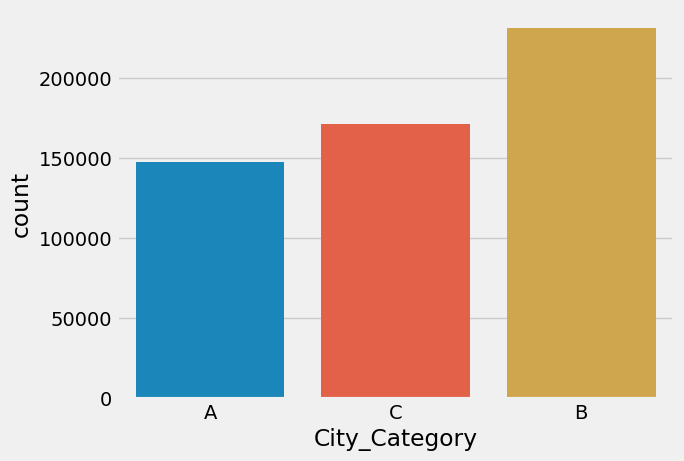

In [ ]:
sns.countplot(x = df['City_Category'])

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

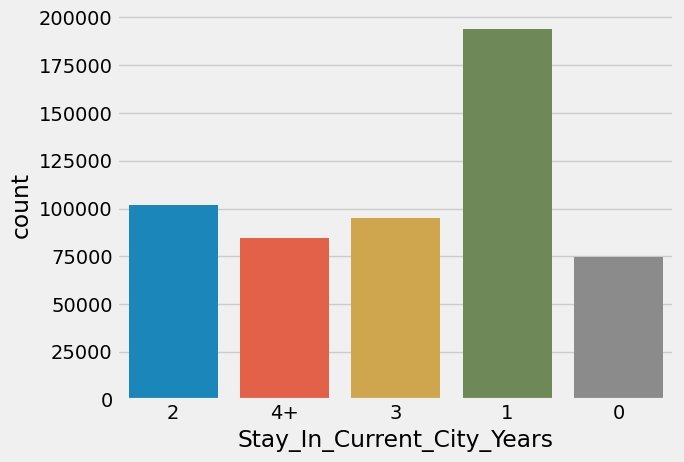

In [ ]:
sns.countplot(x = df['Stay_In_Current_City_Years'])

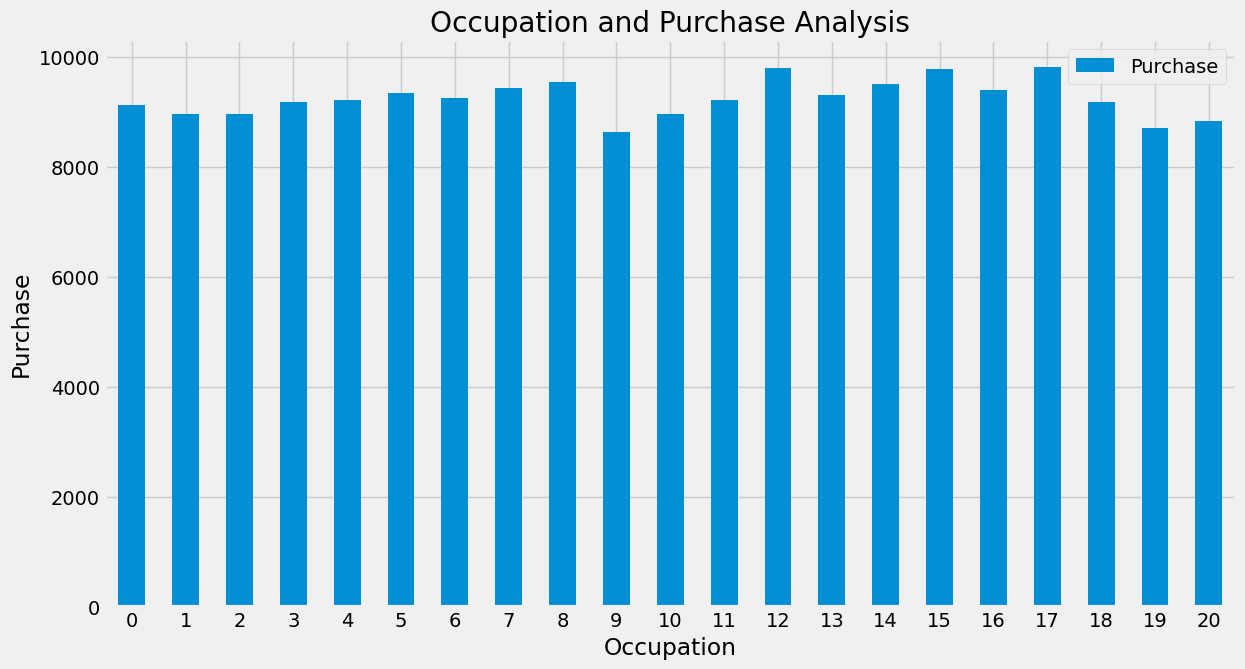

In [ ]:
# bivariate analysis
occupation_plot = df.pivot_table(index='Occupation', values='Purchase', aggfunc=np.mean)
occupation_plot.plot(kind='bar', figsize=(13, 7))
plt.xlabel('Occupation')
plt.ylabel("Purchase")
plt.title("Occupation and Purchase Analysis")
plt.xticks(rotation=0)
plt.show()

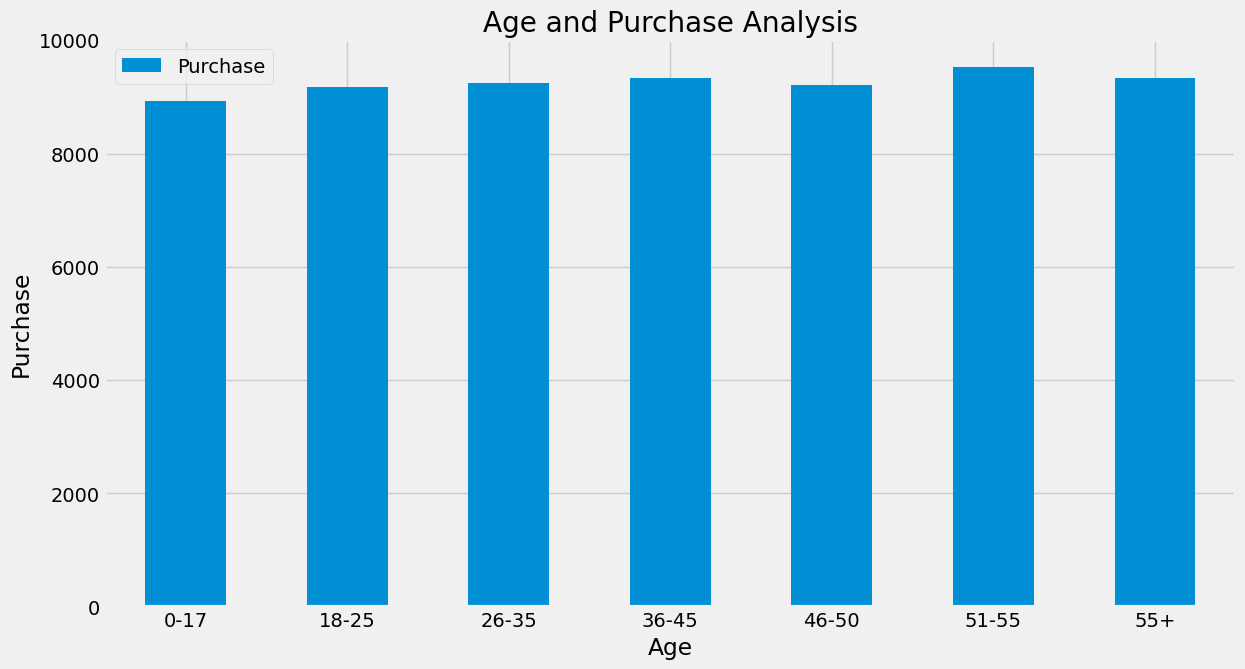

In [ ]:
age_plot = df.pivot_table(index='Age', values='Purchase', aggfunc=np.mean)
age_plot.plot(kind='bar', figsize=(13, 7))
plt.xlabel('Age')
plt.ylabel("Purchase")
plt.title("Age and Purchase Analysis")
plt.xticks(rotation=0)
plt.show()

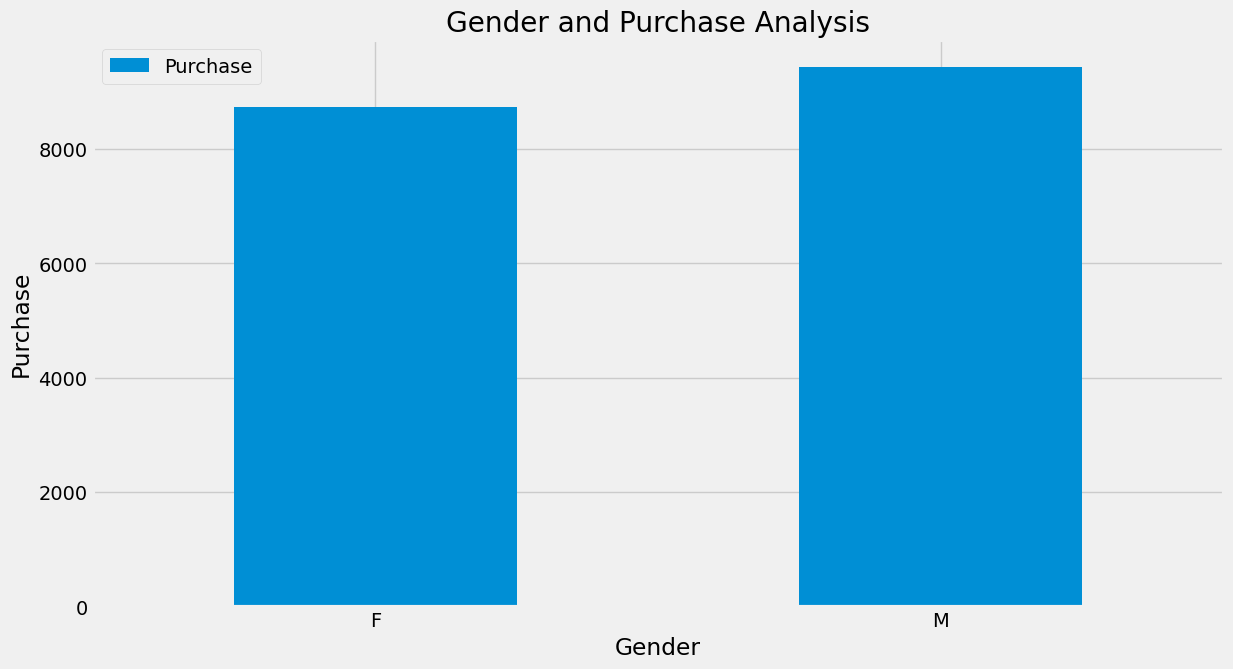

In [ ]:
gender_plot = df.pivot_table(index='Gender', values='Purchase', aggfunc=np.mean)
gender_plot.plot(kind='bar', figsize=(13, 7))
plt.xlabel('Gender')
plt.ylabel("Purchase")
plt.title("Gender and Purchase Analysis")
plt.xticks(rotation=0)
plt.show()

## Preprocessing the dataset

In [ ]:
# check for null values
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [4]:
df['Product_Category_2'] = df['Product_Category_2'].fillna(-2.0).astype("float32")
df['Product_Category_3'] = df['Product_Category_3'].fillna(-2.0).astype("float32")

In [ ]:
### Missing value imputation: We will check the missing values in each column and impute them if necessary. 
### For example, we can impute missing values in Product_Category_2 and Product_Category_3 columns with -2.

In [ ]:
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

###ENCODING

In [5]:
# encoding values using dict
gender_dict = {'F':0, 'M':1}
df['Gender'] = df['Gender'].apply(lambda x: gender_dict[x])
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0-17,10,A,2,0,3,-2.0,-2.0,8370
1,1000001,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,0,0-17,10,A,2,0,12,-2.0,-2.0,1422
3,1000001,P00085442,0,0-17,10,A,2,0,12,14.0,-2.0,1057
4,1000002,P00285442,1,55+,16,C,4+,0,8,-2.0,-2.0,7969


In [6]:
# to improve the metric use one hot encoding
# label encoding
cols = ['Age', 'City_Category', 'Stay_In_Current_City_Years']
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in cols:
    df[col] = le.fit_transform(df[col])
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0,10,0,2,0,3,-2.0,-2.0,8370
1,1000001,P00248942,0,0,10,0,2,0,1,6.0,14.0,15200
2,1000001,P00087842,0,0,10,0,2,0,12,-2.0,-2.0,1422
3,1000001,P00085442,0,0,10,0,2,0,12,14.0,-2.0,1057
4,1000002,P00285442,1,6,16,2,4,0,8,-2.0,-2.0,7969


###HANDLING OUTLIERS PART

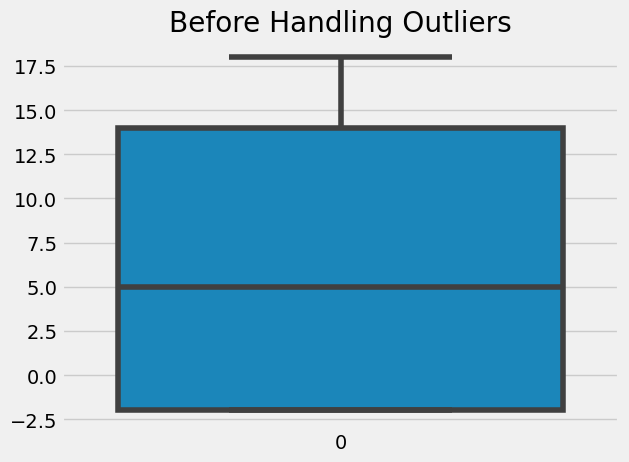

In [ ]:
sns.boxplot(df['Product_Category_2'])
plt.title('Before Handling Outliers')
plt.show()

In [7]:
### We will use the IQR method to detect and remove outliers from the Purchase column.
Q1 = df['Product_Category_2'].quantile(0.25)
Q3 = df['Product_Category_2'].quantile(0.75)
IQR = Q3 - Q1

df = df[(df['Product_Category_2'] > Q1 - 1.5*IQR) & (df['Product_Category_2'] < Q3 + 1.5*IQR)]




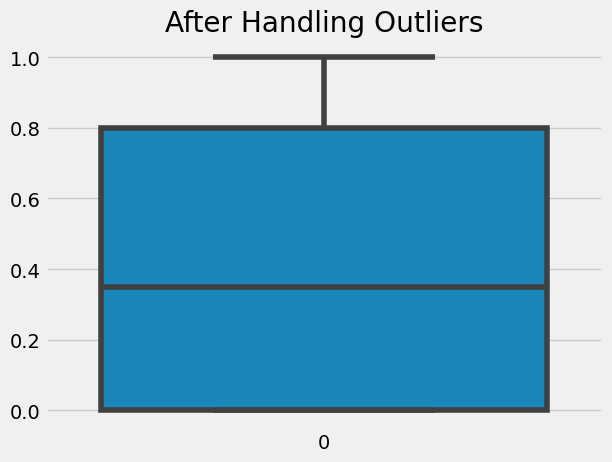

In [ ]:
sns.boxplot(df['Product_Category_2'])
plt.title('After Handling Outliers')
plt.show()

### Coorelation Matrix



<Axes: >

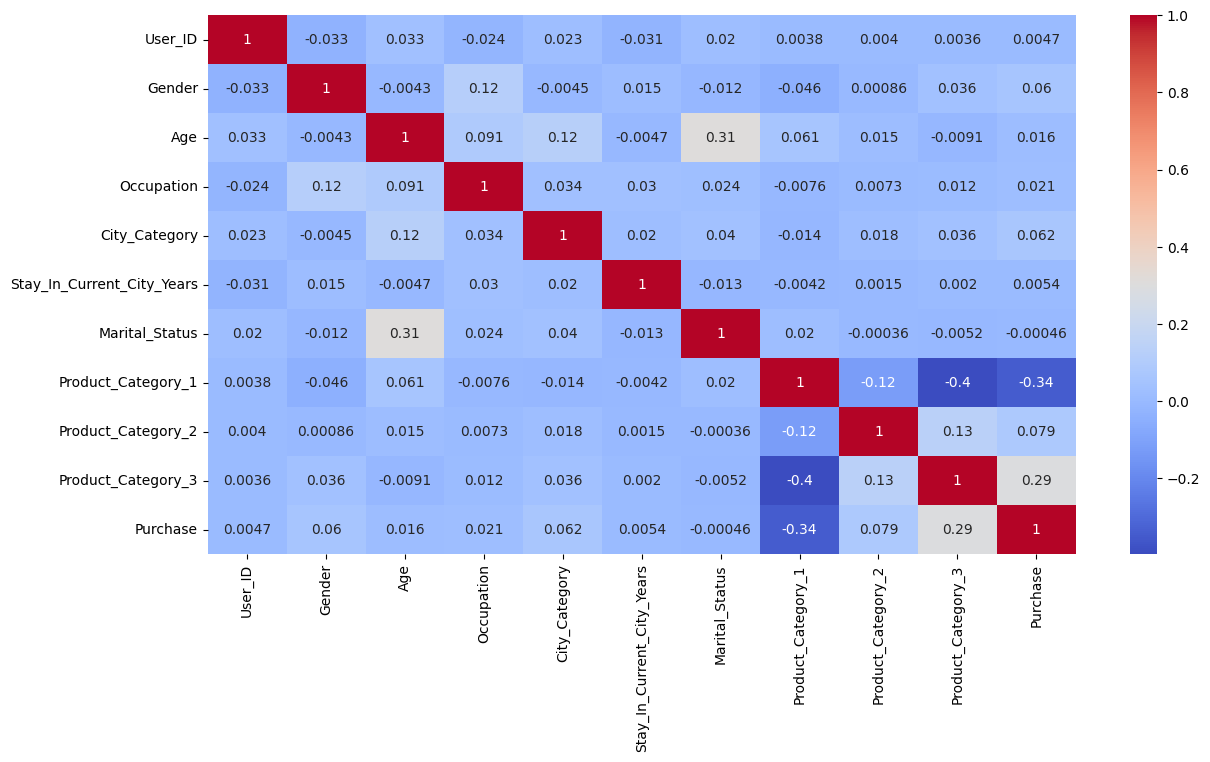

In [8]:
corr = df.corr()
plt.figure(figsize=(14,7))
sns.heatmap(corr, annot=True, cmap='coolwarm')

## Input Split

In [ ]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Total_Products_by_User,Avg_Purchase_by_City
0,0.000000,P00069042,0,0,0.5,0,2,0,0.105263,0.0,0.0,8370,35,8845.367393
1,0.000000,P00248942,0,0,0.5,0,2,0,0.000000,0.4,0.8,15200,35,8845.367393
2,0.000000,P00087842,0,0,0.5,0,2,0,0.578947,0.0,0.0,1422,35,8845.367393
3,0.000000,P00085442,0,0,0.5,0,2,0,0.578947,0.8,0.0,1057,35,8845.367393
4,0.000166,P00285442,1,6,0.8,2,4,0,0.368421,0.0,0.0,7969,77,9645.647300


In [9]:
X = df.drop(columns=['User_ID', 'Product_ID', 'Purchase'])
y = df['Purchase']

###FEATURE SCALING/NORMALIZATION PART

In [10]:
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, Normalizer

#these columns contains numerical data
col = ['User_ID', 'Occupation', 'Product_Category_1', 'Product_Category_2', 'Product_Category_3']
sc = StandardScaler()
df[col] = sc.fit_transform(df[col])





###CREATION OF NEW ATTRIBUTES

In [ ]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Total_Products_by_User,Avg_Purchase_by_City
0,0.000000,P00069042,0,0,0.5,0,2,0,0.105263,0.0,0.0,8370,35,8845.367393
1,0.000000,P00248942,0,0,0.5,0,2,0,0.000000,0.4,0.8,15200,35,8845.367393
2,0.000000,P00087842,0,0,0.5,0,2,0,0.578947,0.0,0.0,1422,35,8845.367393
3,0.000000,P00085442,0,0,0.5,0,2,0,0.578947,0.8,0.0,1057,35,8845.367393
4,0.000166,P00285442,1,6,0.8,2,4,0,0.368421,0.0,0.0,7969,77,9645.647300


In [11]:
df['Total_Products_by_User'] = df.groupby('User_ID')['Product_ID'].transform('count')
###Total number of user-specific products: You can calculate the total number of products purchased for each user.

df['Avg_Purchase_by_City'] = df.groupby('City_Category')['Purchase'].transform('mean')
###Average purchase amount by city category: You can calculate the average value of the purchase amount for each city category.

In [ ]:

df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Total_Products_by_User,Avg_Purchase_by_City
0,0.000000,P00069042,0,0,0.5,0,2,0,0.105263,0.0,0.0,8370,35,8845.367393
1,0.000000,P00248942,0,0,0.5,0,2,0,0.000000,0.4,0.8,15200,35,8845.367393
2,0.000000,P00087842,0,0,0.5,0,2,0,0.578947,0.0,0.0,1422,35,8845.367393
3,0.000000,P00085442,0,0,0.5,0,2,0,0.578947,0.8,0.0,1057,35,8845.367393
4,0.000166,P00285442,1,6,0.8,2,4,0,0.368421,0.0,0.0,7969,77,9645.647300


## Model Training

In [19]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
def train(model, X, y):
    # train-test split
    x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.30)
    model.fit(x_train, y_train)
    
    # predict the results
    pred = model.predict(x_test)
    
    # cross validation
    cv_score = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5)
    cv_score = np.abs(np.mean(cv_score))
    
    print("Results")
    print("MSE:", np.sqrt(mean_squared_error(y_test, pred)))
    print("CV Score:", np.sqrt(cv_score))

In [ ]:
### decision tree

Results
MSE: 3482.0864492025125
CV Score: 3449.40318624376


<Axes: title={'center': 'Feature Importance'}>

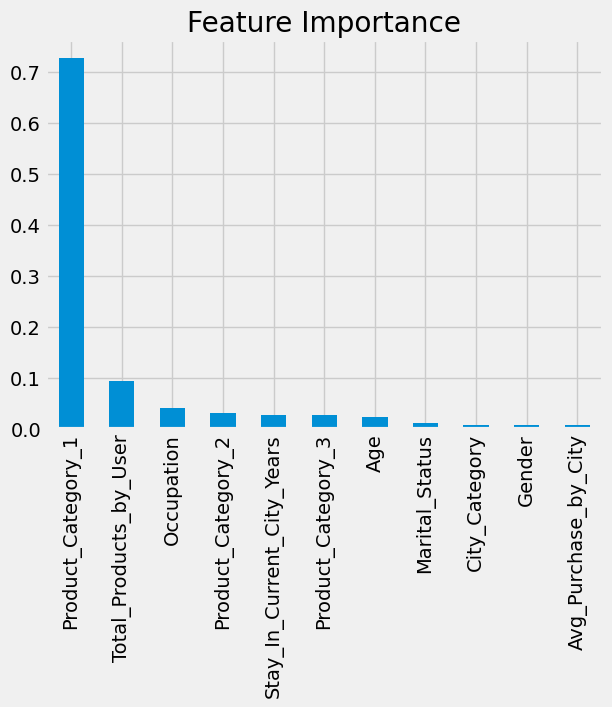

In [ ]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
train(model, X, y)
features = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
features.plot(kind='bar', title='Feature Importance')

In [ ]:
### extra trees

Results
MSE: 3137.623884258123
CV Score: 3128.107501029108


<Axes: title={'center': 'Feature Importance'}>

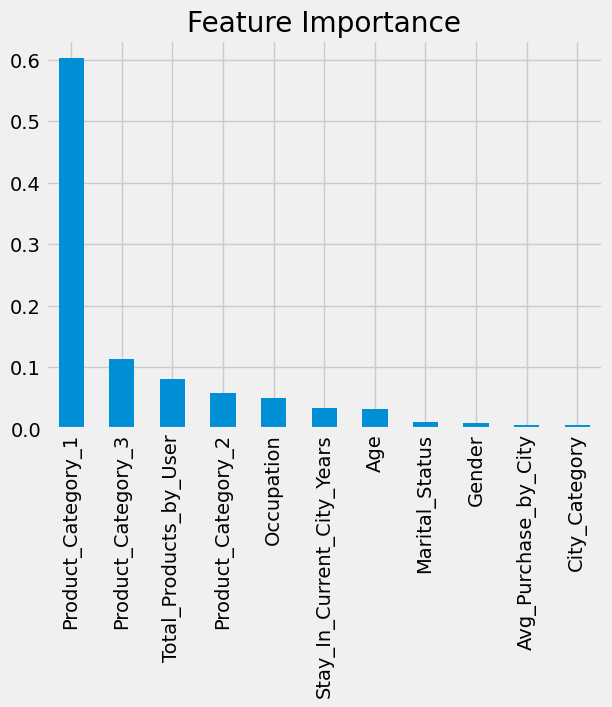

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor(n_jobs=-1)
train(model, X, y)
features = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
features.plot(kind='bar', title='Feature Importance')

In [ ]:
### xgb regressor

Results
MSE: 2795.779971892693
CV Score: 2793.013741651973


<Axes: title={'center': 'Feature\xa0Importance'}>

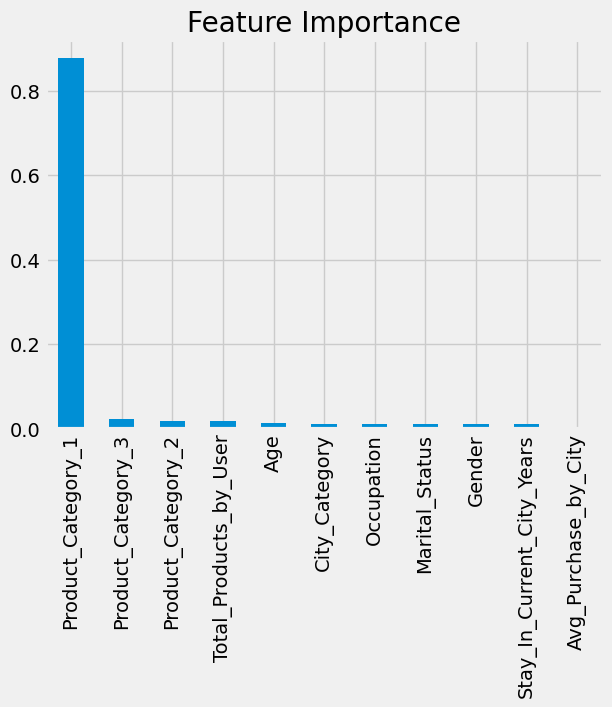

In [ ]:
from xgboost.sklearn import XGBRegressor
model = XGBRegressor(learning_rate=1.0, max_depth=6, min_child_weight=40, seed=0)
train(model, X, y)
features = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
features.plot(kind='bar', title='Feature Importance')

In [ ]:
###linear regression

Results
MSE: 4624.547078823614
CV Score: 4625.252945835687


<Axes: title={'center': 'Model Coefficients'}>

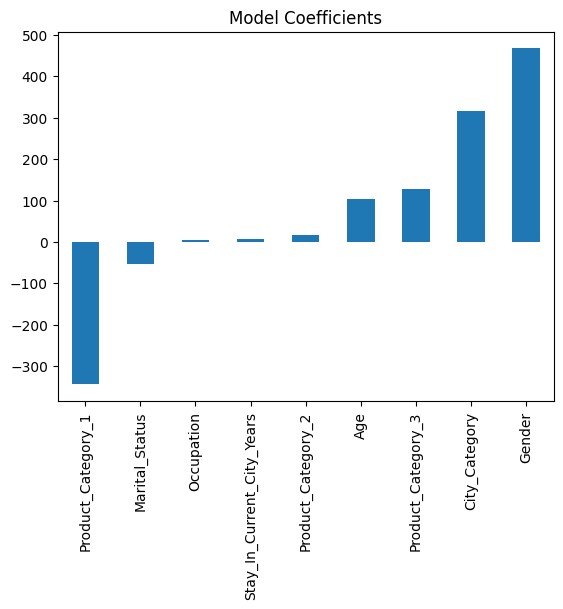

In [20]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
train(model, X, y)
coef = pd.Series(model.coef_, X.columns).sort_values()
coef.plot(kind='bar', title='Model Coefficients')


###MODEL TUNING PART

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from xgboost.sklearn import XGBRegressor
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = XGBRegressor(learning_rate=0.1, max_depth=5, min_child_weight=1, seed=0)

pipeline = Pipeline([('model', model)])

# defining the hyperparameters to search over using GridSearchCV
parameters = {
    'model__max_depth': [ 3,5,7],
    'model__learning_rate': [0.01, 0.1, 0.5],
    'model__min_child_weight': [1,10, 50]
}

grid = GridSearchCV(pipeline, parameters, cv=5)
grid.fit(X_train, y_train)
print("Best Hyperparameters: ", grid.best_params_)

best = grid.best_estimator_
best.fit(X_train, y_train)

prediction = best.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, prediction))
print("RMSE: ", rmse)

Best Hyperparameters:  {'model__learning_rate': 0.5, 'model__max_depth': 7, 'model__min_child_weight': 50}
RMSE:  2768.1450270884225
